In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# pip install mlxtend
#pip install missingno
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# From p
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy.stats as stats
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [6]:
os.chdir('C:/Users/Shivam Varshney/Desktop/ML project sem03/project_files')
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.columns
diabetes_df.info()
diabetes_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.isnull().head(10)
diabetes_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


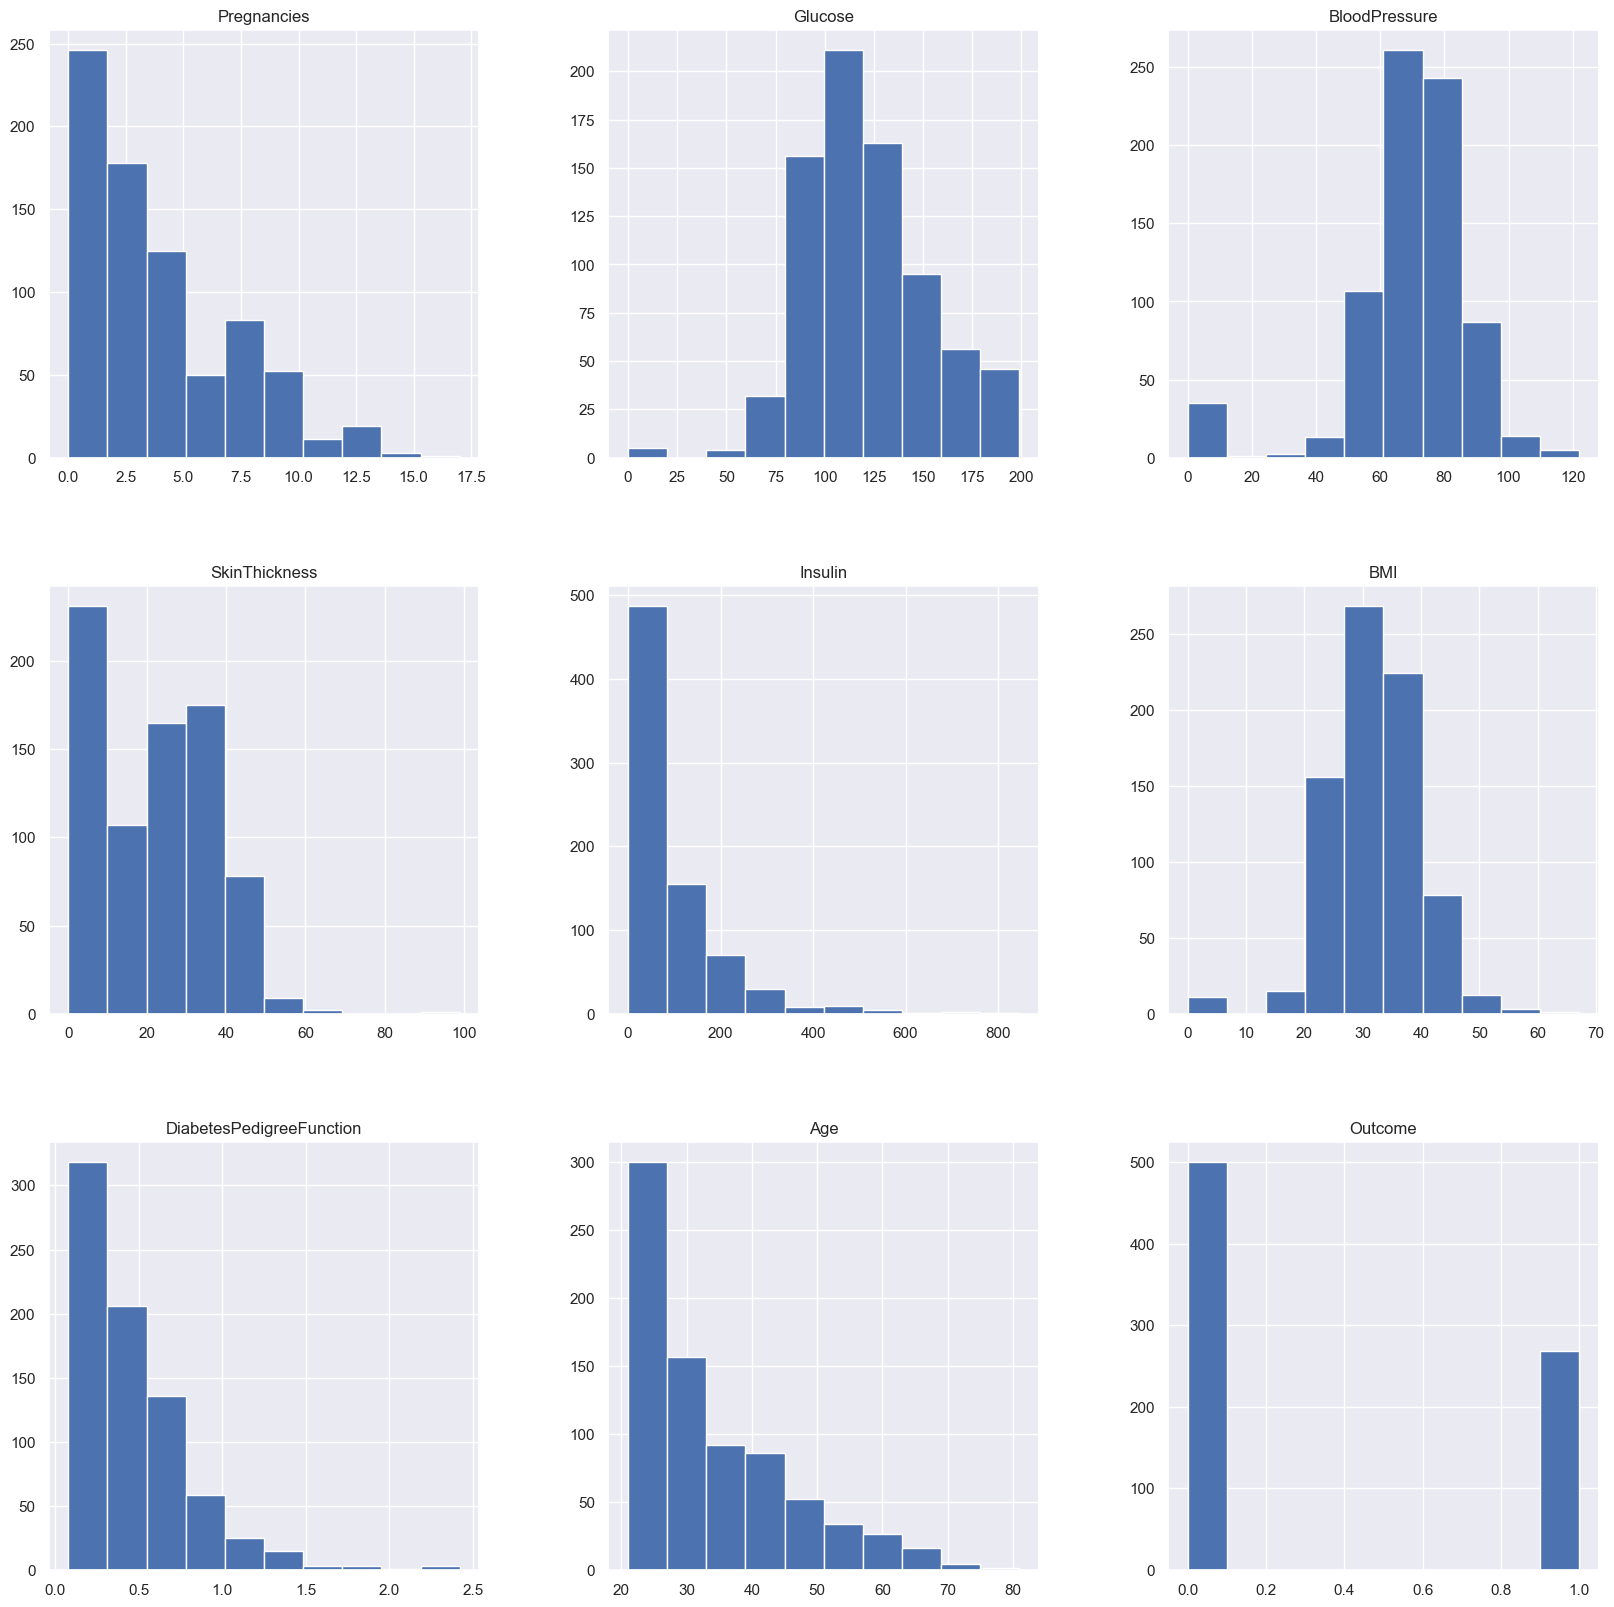

In [10]:
# from A

p = diabetes_df.hist(figsize = (20,20))


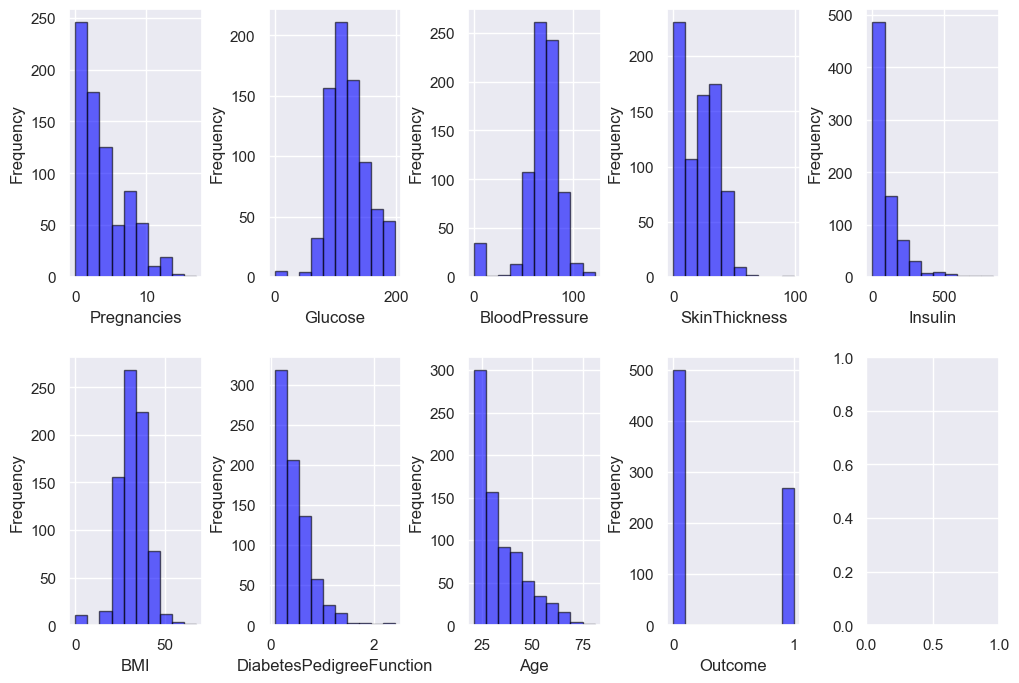

In [11]:
# from P
fig, axes = plt.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()
feature_names = [
    "Pregnancies", "Glucose", "BloodPressure", 
    "SkinThickness", "Insulin", "BMI", 
    "DiabetesPedigreeFunction", "Age", "Outcome"
]

plt.subplots_adjust(wspace=0.5, hspace=0.3)

for k in range(len(feature_names)):
    ax = axes[k]
    ax.hist(x=diabetes_df[feature_names[k]], color="blue", alpha=0.6, edgecolor="black")
    ax.set_xlabel(feature_names[k])
    ax.set_ylabel("Frequency")

plt.show()


Scatter plot


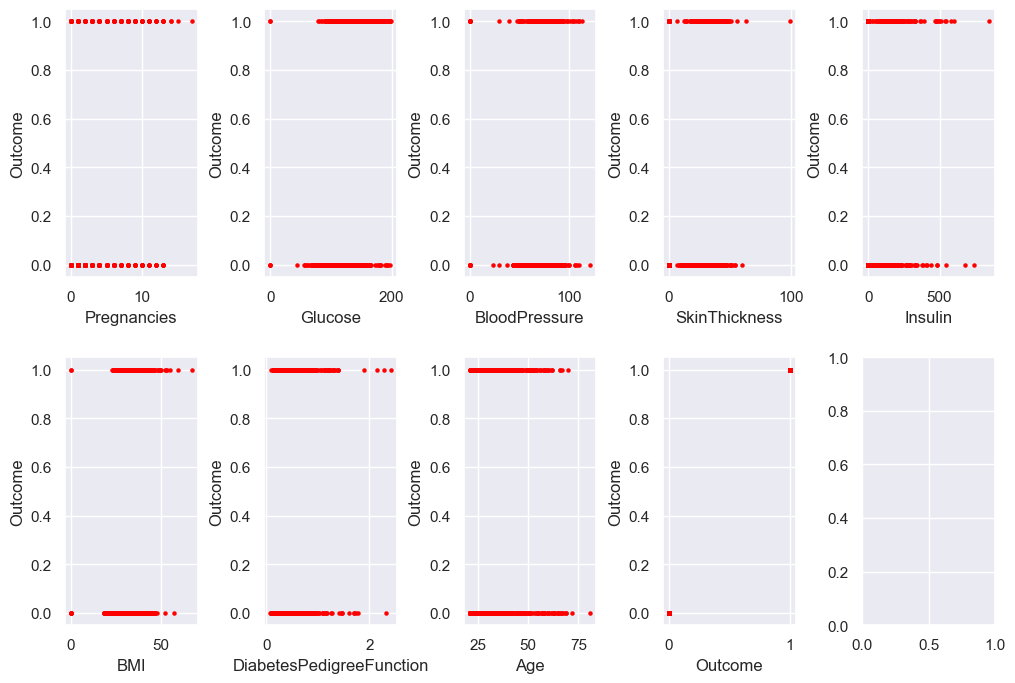

In [12]:
#fig, axes = plt.subplots(2, 5, figsize=(12, 8))
#axes = axes.flatten()

#plt.subplots_adjust(wspace=0.5, hspace=0.3)

#features = diabetes_df.shape[1]
#feature_names = [
   # "Pregnancies", "Glucose", "BloodPressure",
  #  "SkinThickness", "Insulin", "BMI",
 #   "DiabetesPedigreeFunction", "Age", "Outcome"
#]

#for i in range(features):
  #  ax = axes[i]
 #   ax.scatter(diabetes_df.iloc[:, i], diabetes_df['Outcome'], marker="o", c="red", s=5)
   # ax.set_ylabel("Outcome")
    #ax.set_xlabel(feature_names[i])

#plt.show()

# QQ PLOT - TRIAL

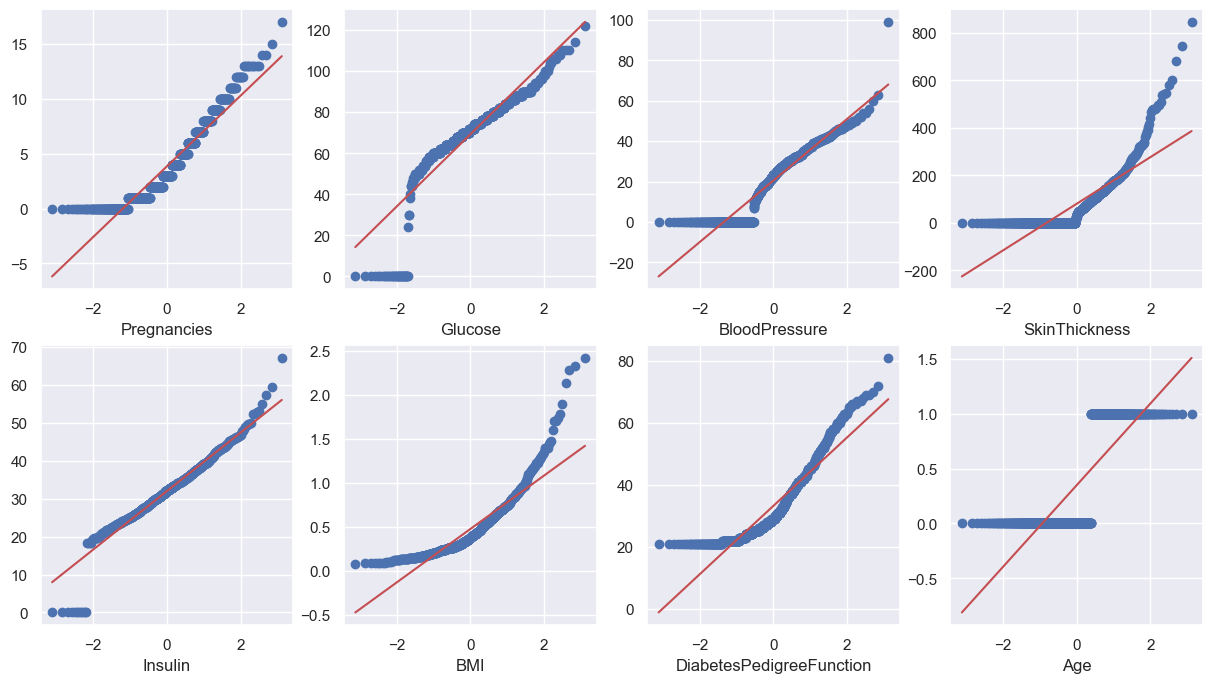

In [21]:
feature_names = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"
]


indices=[0,2,3,4,5,6,7,8]

fig,axes=plt.subplots(2,4,figsize=(15,8))
axes=axes.flatten()
for i,index in enumerate(indices):
    ax=axes[i]
    stats.probplot(diabetes_df.iloc[:, index], dist="norm", plot=ax)
    ax.set_title("")
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("")
plt.show()

Based on QQ plots above, we could observe that Pregnancies, Glucose, Blood pressure and Insulin are mostly likely to follow normal distribution. Regarding the rest features, there exists obvious deviation from the red line in the beginning and tail. 

In [13]:
# Correlation coefficient between explanatory variables and the output:
corrcoef_dict = {}
features = diabetes_df.shape[1]
feature_names = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"
]

for j in range(features):
    coreffi = np.corrcoef(diabetes_df.iloc[:, j], diabetes_df['Outcome'])
    corrcoef_dict[feature_names[j]] = coreffi

print(f"The correlation coefficient between each feature and the target: {corrcoef_dict}")

The correlation coefficient between each feature and the target: {'Pregnancies': array([[1.        , 0.22189815],
       [0.22189815, 1.        ]]), 'Glucose': array([[1.       , 0.4665814],
       [0.4665814, 1.       ]]), 'BloodPressure': array([[1.        , 0.06506836],
       [0.06506836, 1.        ]]), 'SkinThickness': array([[1.        , 0.07475223],
       [0.07475223, 1.        ]]), 'Insulin': array([[1.        , 0.13054795],
       [0.13054795, 1.        ]]), 'BMI': array([[1.        , 0.29269466],
       [0.29269466, 1.        ]]), 'DiabetesPedigreeFunction': array([[1.        , 0.17384407],
       [0.17384407, 1.        ]]), 'Age': array([[1.        , 0.23835598],
       [0.23835598, 1.        ]]), 'Outcome': array([[1., 1.],
       [1., 1.]])}


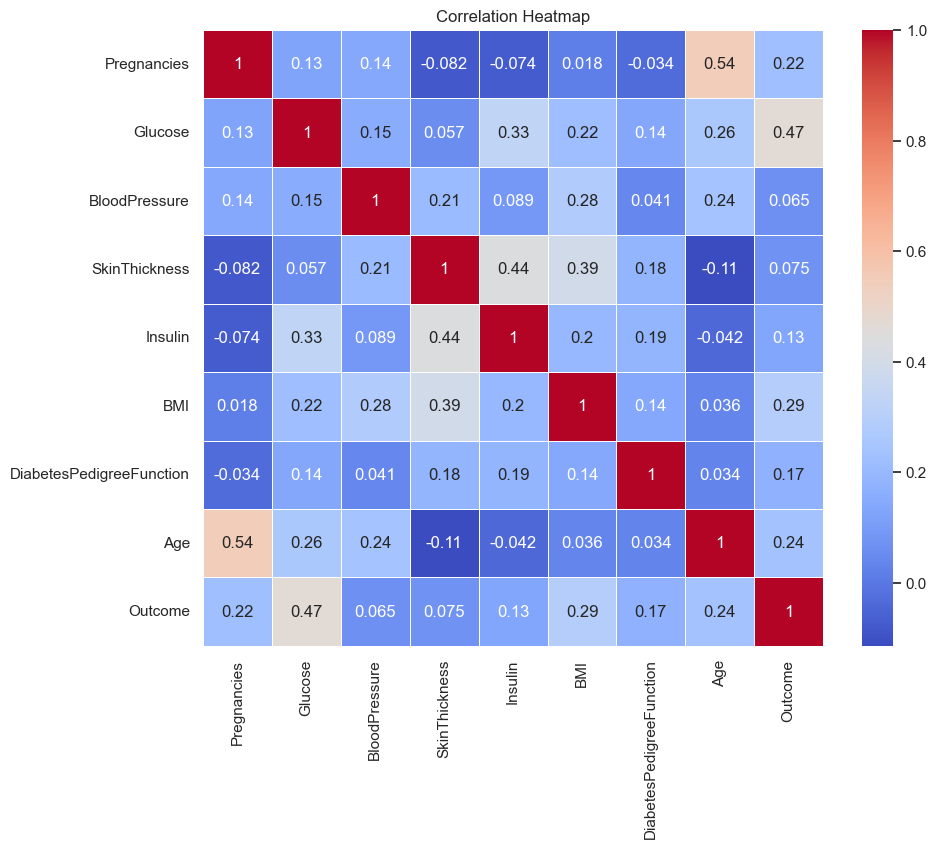

In [44]:
# Correlation heatmap
df = diabetes_df.copy()  # If needed, create a copy of the DataFrame
x_labels=["Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age", "Outcome"
]
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, xticklabels=x_labels, yticklabels=x_labels)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [15]:
print(diabetes_df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


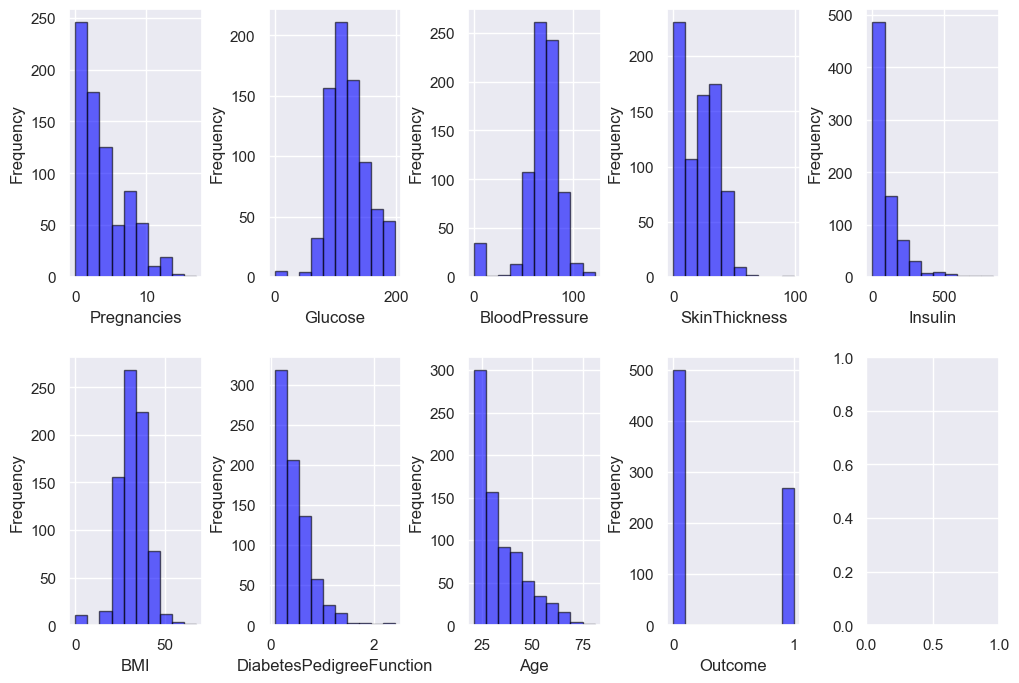

In [16]:
# from P
fig, axes = plt.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()
feature_names = [
    "Pregnancies", "Glucose", "BloodPressure", 
    "SkinThickness", "Insulin", "BMI", 
    "DiabetesPedigreeFunction", "Age", "Outcome"
]

plt.subplots_adjust(wspace=0.5, hspace=0.3)

for k in range(len(feature_names)):
    ax = axes[k]
    ax.hist(x=diabetes_df[feature_names[k]], color="blue", alpha=0.6, edgecolor="black")
    ax.set_xlabel(feature_names[k])
    ax.set_ylabel("Frequency")

plt.show()

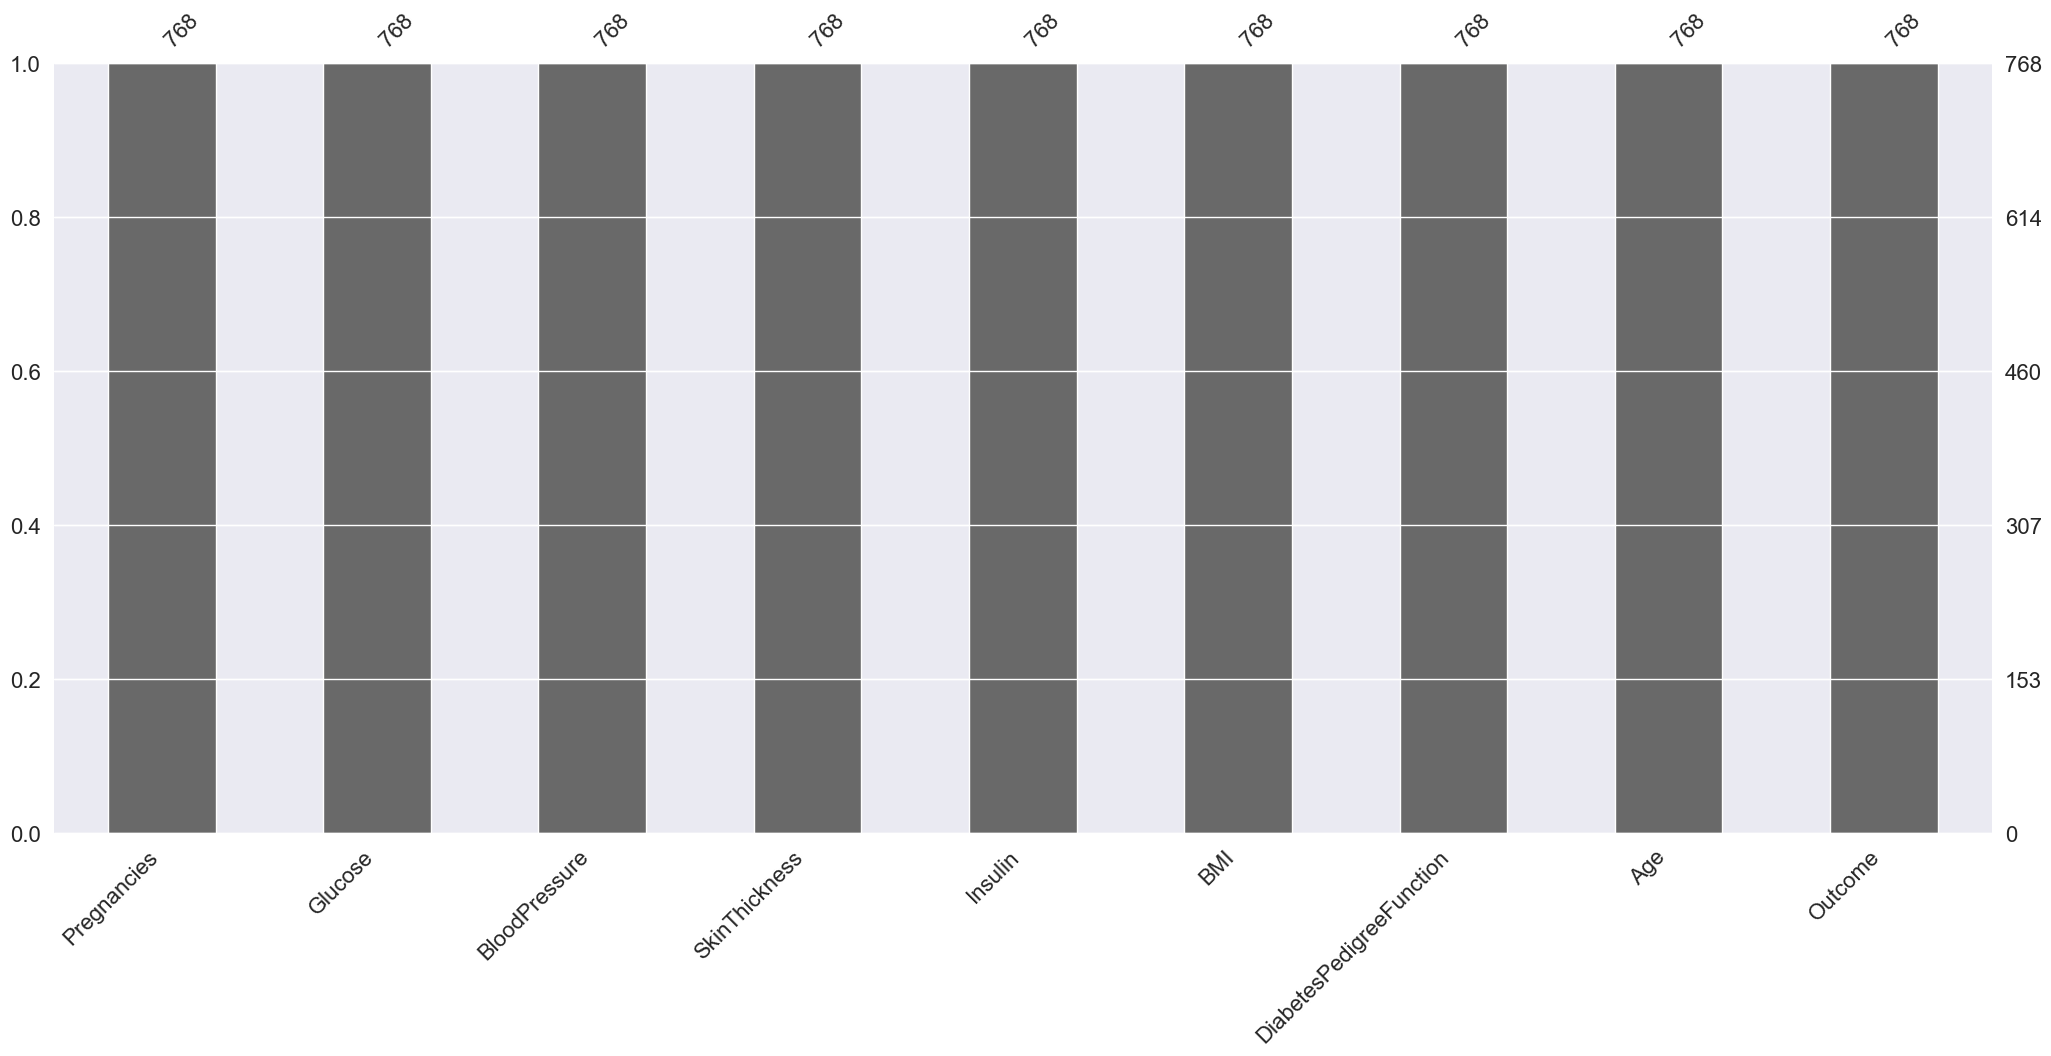

In [17]:
#Plotting Null Count Analysis Plot

p = msno.bar(diabetes_df)


0    500
1    268
Name: Outcome, dtype: int64


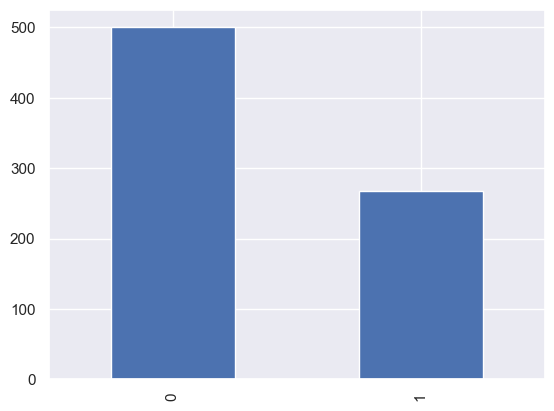

In [50]:
#Now, let’s check that how well our outcome column is balanced

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

# Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.


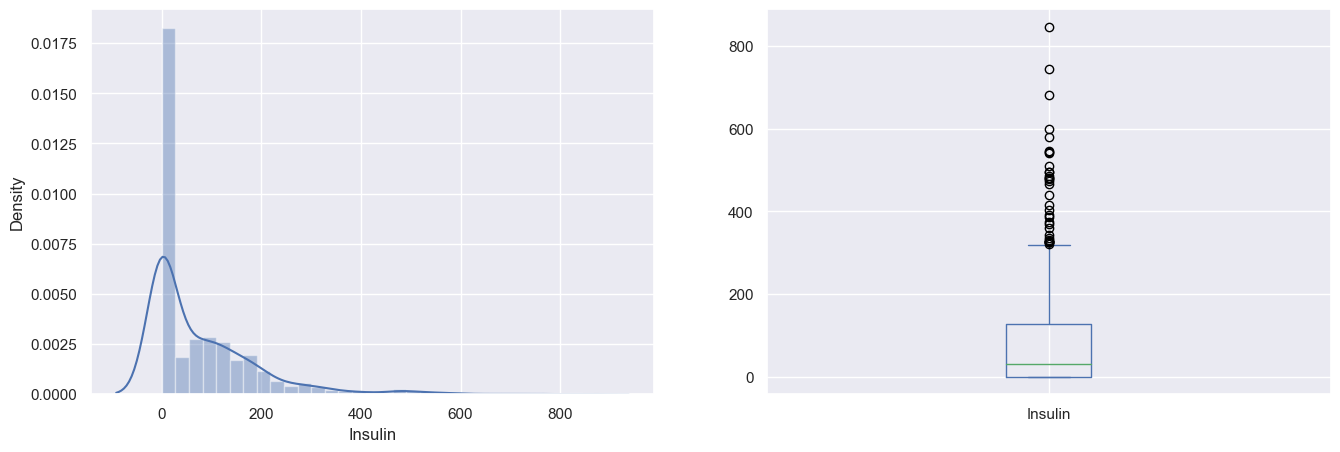

In [18]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

# Scaling the Data

In [22]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
